In [30]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

In [3]:
# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
# Filter for Data Analysts in the US
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [6]:
# Drop na rows, explode job skills, show salary and job_skills

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(6)

,salary_year_avg,job_skills
1681,111175.0,sql
1681,111175.0,tableau
1681,111175.0,power bi
1681,111175.0,excel
3237,120000.0,sql
3237,120000.0,visio


In [19]:
# Group by job skills and aggregate their count and median salaries
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# Rename columns in the dataframe
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

# Get length of Data analysts postings
DA_job_count = len(df_DA_US)

# Create Skill % Columns
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

# Filter to values greater thatn 5%
skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]


df_DA_skills


,skill_count,median_salary,skill_percent
job_skills,,,
sql,714,87500.0,63.864043
excel,472,77500.0,42.218247
python,408,90000.0,36.493739
tableau,398,90000.0,35.599284
power bi,279,87500.0,24.955277
...,...,...,...
django,1,82500.0,0.089445
bitbucket,1,111175.0,0.089445
node,1,65000.0,0.089445


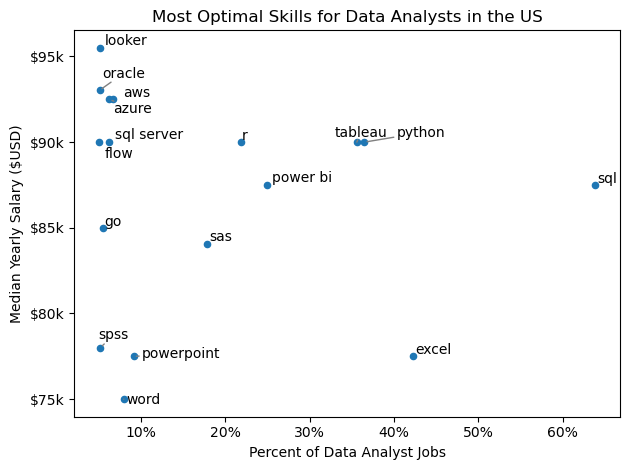

In [32]:
# Plot optimal skills as a percent of total in a scatter plot

from adjustText import adjust_text

df_DA_skills_high_demand .plot(kind='scatter', x='skill_percent', y= 'median_salary')

text = []
for i, txt in enumerate(df_DA_skills_high_demand .index):
    text.append(plt.text(df_DA_skills_high_demand ['skill_percent'].iloc[i], df_DA_skills_high_demand ['median_salary'].iloc[i], txt))

adjust_text(text, arrowprops=dict(arrowstyle="-", color='gray', lw=1.0))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k' ))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

plt.tight_layout()
plt.show()

In [33]:
"""
Removes duplicate entries and any rows with missing values. 
Then, it combines all dictionary entries into a single dictionary, summing values for keys that repeat across entries. 
To ensure each key's values are unique, it converts the values to a set and then back to a list. 
The final result is a dictionary where each key represents a skill and each value is a list of unique attributes associated with that skill.

"""

df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['datarobot',
  'spss',
  'esquisse',
  'powerpoint',
  'outlook',
  'word',
  'ssis',
  'cognos',
  'sap',
  'sharepoint',
  'ms access',
  'power bi',
  'looker',
  'nuix',
  'visio',
  'sas',
  'excel',
  'tableau',
  'splunk',
  'alteryx',
  'dax',
  'msaccess',
  'spreadsheet',
  'powerbi',
  'ssrs',
  'qlik',
  'sheets',
  'microstrategy'],
 'programming': ['r',
  'visual basic',
  'objective-c',
  'c#',
  'groovy',
  'mongo',
  'nosql',
  'lua',
  'delphi',
  'solidity',
  'javascript',
  'elixir',
  'sql',
  'kotlin',
  'fortran',
  'clojure',
  'lisp',
  'visualbasic',
  'python',
  'pascal',
  'bash',
  'erlang',
  'rust',
  'c',
  'dart',
  'typescript',
  'mongodb',
  'ruby',
  'assembly',
  'php',
  'crystal',
  'vb.net',
  'perl',
  'scala',
  'sas',
  'html',
  'matlab',
  'java',
  'no-sql',
  't-sql',
  'vba',
  'julia',
  'golang',
  'haskell',
  'ocaml',
  'apl',
  'shell',
  'sass',
  'swift',
  'f#',
  'c++',
  'css',
  'cobol',
  'powershell',
  

In [35]:
# Put skills from previous dictionary into a dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['Technology', 'Skills'])

# Explode out the skills column from the dataframe
df_technology = df_technology.explode('Skills')

df_technology

,Technology,Skills
0,analyst_tools,datarobot
0,analyst_tools,spss
0,analyst_tools,esquisse
0,analyst_tools,powerpoint
0,analyst_tools,outlook
...,...,...
9,sync,twilio
9,sync,rocketchat
9,sync,webex
9,sync,slack


In [37]:
# Merge TEchnology dataframe with our original skills dataframe
df_plot = df_DA_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='Skills')
df_plot

,skill_count,median_salary,skill_percent,Technology,Skills
0,714,87500.0,63.864043,programming,sql
1,472,77500.0,42.218247,analyst_tools,excel
2,408,90000.0,36.493739,programming,python
3,398,90000.0,35.599284,analyst_tools,tableau
4,279,87500.0,24.955277,analyst_tools,power bi
5,244,90000.0,21.824687,programming,r
6,200,84078.5,17.889088,analyst_tools,sas
7,200,84078.5,17.889088,programming,sas
8,102,77500.0,9.123435,analyst_tools,powerpoint
9,89,75000.0,7.960644,analyst_tools,word


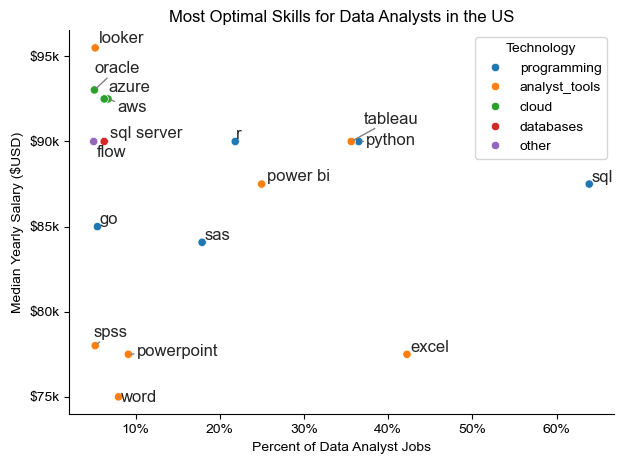

In [40]:
# Plot optimal skills as a percent of total in a scatter plot

from adjustText import adjust_text

# df_plot.plot(kind='scatter', x='skill_percent', y= 'median_salary')

sns.scatterplot(
    data=df_plot, 
    x='skill_percent', 
    y='median_salary', 
    hue='Technology'
    )

sns.despine()
sns.set_theme(style='ticks')

text = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    text.append(plt.text(df_DA_skills_high_demand ['skill_percent'].iloc[i], df_DA_skills_high_demand ['median_salary'].iloc[i], txt))

adjust_text(text, arrowprops=dict(arrowstyle="-", color='gray', lw=1.0))

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k' ))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

plt.tight_layout()
plt.show()